Generating objects trajectories

In [103]:
import json
import numpy as np

traj_circle_r2 = []

T = 20
dt = 0.1
R = 5
w = 2*np.pi / T
x0 = 5
y0 = 5

ts = np.linspace(0, 2*np.pi, int(T / dt))

for t in ts:
    x = x0 + R * np.cos(t)
    y = y0 + R * np.sin(t)
    z = 0
    p = np.array([x, y, z, 0, 0, 0])
    traj_circle_r2.append(p)

np.savetxt('trajectories/traj_circle_r5.txt', traj_circle_r2, delimiter=' ')


In [104]:
import numpy as np

traj_linear_right_down_diag = []

dt = 0.1

for i in range(1000):
    x = 0.7 * i * dt
    y = -0.7 * i * dt + 20
    z = 0
    traj_linear_right_down_diag.append(np.array([x, y, z, 0, 0, 0]))

np.savetxt('trajectories/traj_linear_right_down_diag.txt', traj_linear_right_down_diag, delimiter=' ')

In [105]:
import numpy as np
import pickle

trajs_linear = []

duration = 150
x_start = 2
z_start = 0
y_max = 150
y_step = 10

speeds = [1, 2]
a = 0.5
T = 2
w = 2 * np.pi / T

for y_start in np.arange(0, 150, 10):
    print('processing: ' + str(int(100 * y_start / 150)))
    y_arr = []
    for theta in np.linspace(0, np.pi / 2, 10):
        theta_arr = []
        for phi in np.linspace(0, np.pi / 2, 10):
            phi_arr = []
            for v in speeds:
                v_arr = []
                for t in np.arange(0, 10, 0.1):
                    x = x_start + v * t * np.cos(phi) * np.cos(theta)
                    y = y_start - v * t * np.cos(phi) * np.sin(theta)
                    z = -1 - v * t * np.sin(phi) + a * np.sin(w*t)
                    roll = -theta
                    pitch = -phi + np.arctan2(a, T/4) * np.cos(w*t)
                    yaw = 0
                    point = np.array([x, y, z, roll, pitch, yaw])
                    v_arr.append(point)
                phi_arr.append(v_arr)
            theta_arr.append(phi_arr)
        y_arr.append(theta_arr)
    trajs_linear.append(y_arr)

pickle.dump(trajs_linear, open('trajectories/curvilinear/trajs_curvilinear.bin', 'wb'))

processing: 0
processing: 6
processing: 13
processing: 20
processing: 26
processing: 33
processing: 40
processing: 46
processing: 53
processing: 60
processing: 66
processing: 73
processing: 80
processing: 86
processing: 93


In [106]:
trajs_spline = []

for x0 in np.arange(0, 150, 10):
    print('processing: ' + str(int(100 * x0 / 150)) + '%')
    x_arr = []
    for y0 in np.arange(0, 150, 10):
        y_arr = []
        for r in np.arange(5, 75, 5):
            if x0**2 + y0**2 <= 150**2 + r**2:
                r_arr = []
                z0 = np.random.uniform(-1, -5)
                az = np.random.uniform(0, -z0)
                phi_z = np.random.uniform(0, 2*np.pi)

                for v in np.arange(5, 20, 5):
                    v_arr = []
                    for t in np.arange(0, 2 * np.pi * r / v, 0.1):
                        theta = t * v / r
                        x = x0 + r * np.cos(theta)
                        y = y0 + r * np.sin(theta)
                        z = z0 + az * np.sin(theta + phi_z)
                        roll = theta
                        pitch = theta * np.cos(theta + phi_z)
                        yaw = 0
                        point = np.array([x, y, z, roll, pitch, yaw])
                        v_arr.append(point)

                    r_arr.append(v_arr)
                y_arr.append(r_arr)
        
        x_arr.append(y_arr)
    trajs_spline.append(x_arr)

print('Done. Saving to dump...')
pickle.dump(trajs_spline, open('trajectories/spline/trajs_spline.bin', 'wb'))
print('finished')

processing: 0%
processing: 6%
processing: 13%
processing: 20%
processing: 26%
processing: 33%
processing: 40%
processing: 46%
processing: 53%
processing: 60%
processing: 66%
processing: 73%
processing: 80%
processing: 86%
processing: 93%
Done. Saving to dump...
finished


Other purposes

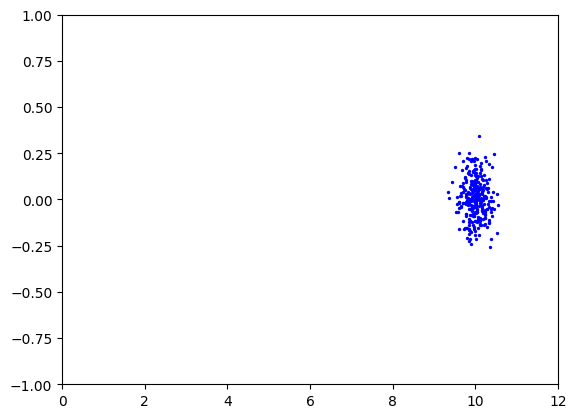

In [107]:
import numpy as np
import matplotlib.pyplot as plt

meas = []

for i in range(300):
    r = 10 + np.random.normal(0, 0.2)
    theta = np.random.normal(0, 0.01)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    plt.scatter(x, y, s=2, color='blue')

plt.axis([0, 12, -1, 1])
plt.show()

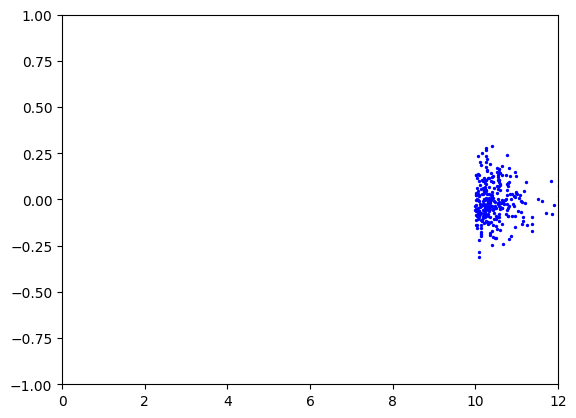

In [108]:
for i in range(300):
    r = 10 + np.random.exponential(0.5, 1)
    theta = np.random.normal(0, 0.01)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    plt.scatter(x, y, s=2, color='blue')

plt.axis([0, 12, -1, 1])
plt.show()

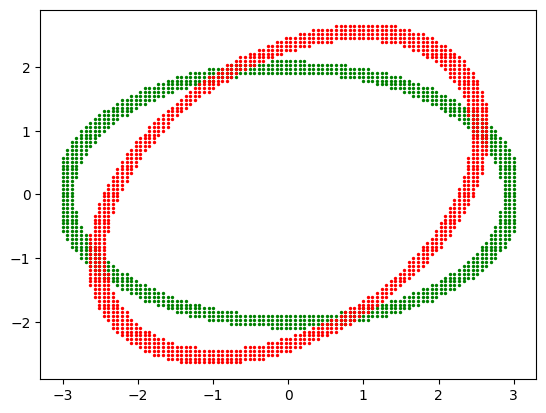

In [109]:
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt

a = 3
b = 2

def rotate(A, angle):
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle), np.cos(angle)]])
    
    return R @ A @ R.T


def check(A, p):
    return abs(p.T @ A @ p - 1) <= 0.1


A = np.array([[1/a**2, 0],
              [0, 1/b**2]])

A_new = rotate(A, np.pi / 4)

for i in np.linspace(-3, 3, 100):
    for j in np.linspace(-3, 3, 100):
        if check(A, np.array([i, j])):
            plt.scatter(i, j, s=2, color='green')
        if check(A_new, np.array([i, j])):
            plt.scatter(i, j, s=2, color='red')

plt.show()





Trajectory test visualizer

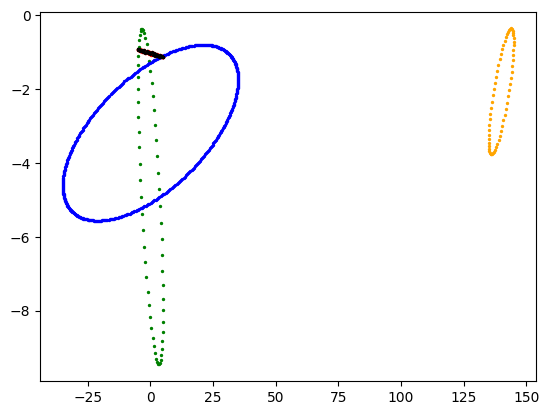

In [110]:
import matplotlib.pyplot as plt

trajs = pickle.load(open('trajectories/spline/trajs_spline.bin', 'rb'))

traj = trajs[0][0][0][0]
for point in traj:
    x, y, z, roll, pitch, yaw = point
    plt.scatter(x, z, s=2, color='red')

traj = trajs[14][0][0][0]
for point in traj:
    x, y, z, roll, pitch, yaw = point
    plt.scatter(x, z, s=2, color='orange')

traj = trajs[0][7][0][0]
for point in traj:
    x, y, z, roll, pitch, yaw = point
    plt.scatter(x, z, s=2, color='green')

traj = trajs[0][8][6][0]
for point in traj:
    x, y, z, roll, pitch, yaw = point
    plt.scatter(x, z, s=2, color='blue')

traj = trajs[0][0][0][1]
for point in traj:
    x, y, z, roll, pitch, yaw = point
    plt.scatter(x, z, s=2, color='black')

plt.show()

number on points: 15800
progress: 0%
progress: 1%
progress: 2%
progress: 3%
progress: 4%
progress: 5%
progress: 6%
progress: 7%
progress: 8%
progress: 9%
progress: 10%
progress: 11%
progress: 12%
progress: 13%
progress: 14%
progress: 15%
progress: 16%
progress: 17%
progress: 18%
progress: 19%
progress: 20%
progress: 21%
progress: 22%
progress: 23%
progress: 24%
progress: 25%
progress: 26%
progress: 27%
progress: 28%
progress: 29%
progress: 30%
progress: 31%
progress: 32%
progress: 33%
progress: 34%
progress: 35%
progress: 36%
progress: 37%
progress: 38%
progress: 39%
progress: 40%
progress: 41%
progress: 42%
progress: 43%
progress: 44%
progress: 45%
progress: 46%
progress: 47%
progress: 48%
progress: 49%
progress: 50%
progress: 51%
progress: 52%
progress: 53%
progress: 54%
progress: 55%
progress: 56%
progress: 57%
progress: 58%
progress: 59%
progress: 60%
progress: 61%
progress: 62%
progress: 63%
progress: 64%
progress: 65%
progress: 66%
progress: 67%
progress: 68%
progress: 69%
progre

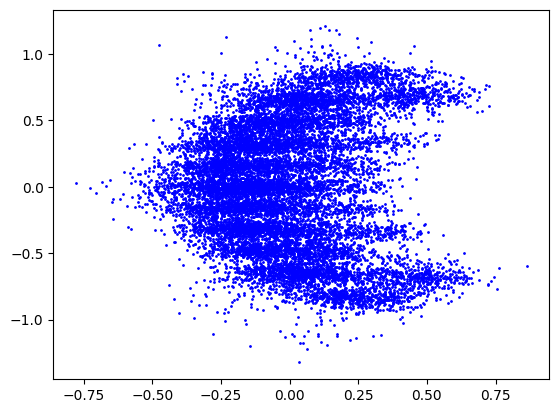

In [111]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

cloud = pickle.load(open('datasets/synthetic/morphologic/concatenated/sphere_angle_1.bin', 'rb'))
n = len(cloud)
print('number on points: ' + str(n))
iter = 0
progress_prev = -1

for point in cloud:
    progress = int(100 * iter / n)
    if progress > progress_prev:
        print('progress: ' + str(progress) + '%')
        progress_prev = progress

    x, y, z = point
    plt.scatter(x, y, s=1, color='blue')
    iter += 1

plt.show()

number on points: 1800
progress: 0%
progress: 1%
progress: 2%
progress: 3%
progress: 4%
progress: 5%
progress: 6%
progress: 7%
progress: 8%
progress: 9%
progress: 10%
progress: 11%
progress: 12%
progress: 13%
progress: 14%
progress: 15%
progress: 16%
progress: 17%
progress: 18%
progress: 19%
progress: 20%
progress: 21%
progress: 22%
progress: 23%
progress: 24%
progress: 25%
progress: 26%
progress: 27%
progress: 28%
progress: 29%
progress: 30%
progress: 31%
progress: 32%
progress: 33%
progress: 34%
progress: 35%
progress: 36%
progress: 37%
progress: 38%
progress: 39%
progress: 40%
progress: 41%
progress: 42%
progress: 43%
progress: 44%
progress: 45%
progress: 46%
progress: 47%
progress: 48%
progress: 49%
progress: 50%
progress: 51%
progress: 52%
progress: 53%
progress: 54%
progress: 55%
progress: 56%
progress: 57%
progress: 58%
progress: 59%
progress: 60%
progress: 61%
progress: 62%
progress: 63%
progress: 64%
progress: 65%
progress: 66%
progress: 67%
progress: 68%
progress: 69%
progres

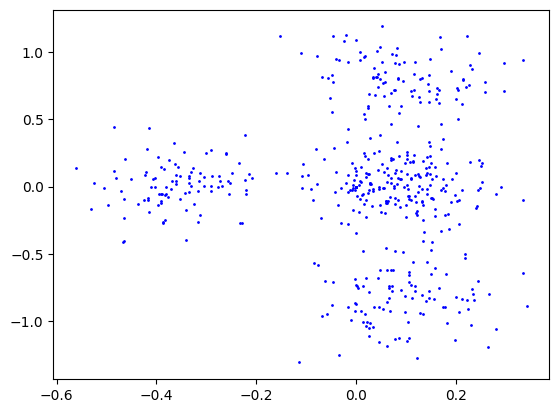

In [112]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

cloud = pickle.load(open('datasets/synthetic/morphologic/concatenated/sphere_angle_5.bin', 'rb'))
n = len(cloud)
print('number on points: ' + str(n))
iter = 0
progress_prev = -1

for point in cloud:
    progress = int(100 * iter / n)
    if progress > progress_prev:
        print('progress: ' + str(progress) + '%')
        progress_prev = progress

    x, y, z = point
    plt.scatter(x, y, s=1, color='blue')
    iter += 1

plt.show()

number on points: 4956
progress: 0%
progress: 1%
progress: 2%
progress: 3%
progress: 4%
progress: 5%
progress: 6%
progress: 7%
progress: 8%
progress: 9%
progress: 10%
progress: 11%
progress: 12%
progress: 13%
progress: 14%
progress: 15%
progress: 16%
progress: 17%
progress: 18%
progress: 19%
progress: 20%
progress: 21%
progress: 22%
progress: 23%
progress: 24%
progress: 25%
progress: 26%
progress: 27%
progress: 28%
progress: 29%
progress: 30%
progress: 31%
progress: 32%
progress: 33%
progress: 34%
progress: 35%
progress: 36%
progress: 37%
progress: 38%
progress: 39%
progress: 40%
progress: 41%
progress: 42%
progress: 43%
progress: 44%
progress: 45%
progress: 46%
progress: 47%
progress: 48%
progress: 49%
progress: 50%
progress: 51%
progress: 52%
progress: 53%
progress: 54%
progress: 55%
progress: 56%
progress: 57%
progress: 58%
progress: 59%
progress: 60%
progress: 61%
progress: 62%
progress: 63%
progress: 64%
progress: 65%
progress: 66%
progress: 67%
progress: 68%
progress: 69%
progres

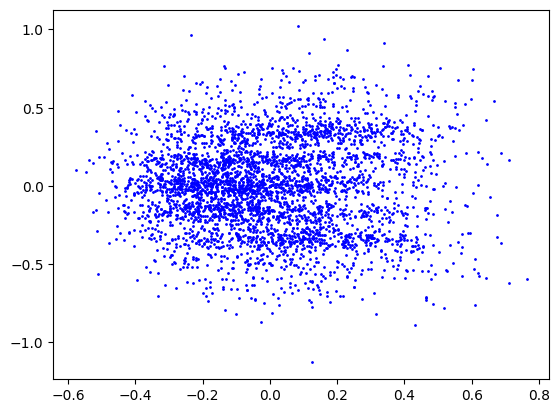

In [113]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

cloud = pickle.load(open('datasets/synthetic/morphologic/concatenated/human_angle_1.bin', 'rb'))
n = len(cloud)
print('number on points: ' + str(n))
iter = 0
progress_prev = -1

for point in cloud:
    progress = int(100 * iter / n)
    if progress > progress_prev:
        print('progress: ' + str(progress) + '%')
        progress_prev = progress

    x, y, z = point
    plt.scatter(x, y, s=1, color='blue')
    iter += 1

plt.show()

number on points: 1408
progress: 0%
progress: 1%
progress: 2%
progress: 3%
progress: 4%
progress: 5%
progress: 6%
progress: 7%
progress: 8%
progress: 9%
progress: 10%
progress: 11%
progress: 12%
progress: 13%
progress: 14%
progress: 15%
progress: 16%
progress: 17%
progress: 18%
progress: 19%
progress: 20%
progress: 21%
progress: 22%
progress: 23%
progress: 24%
progress: 25%
progress: 26%
progress: 27%
progress: 28%
progress: 29%
progress: 30%
progress: 31%
progress: 32%
progress: 33%
progress: 34%
progress: 35%
progress: 36%
progress: 37%
progress: 38%
progress: 39%
progress: 40%
progress: 41%
progress: 42%
progress: 43%
progress: 44%
progress: 45%
progress: 46%
progress: 47%
progress: 48%
progress: 49%
progress: 50%
progress: 51%
progress: 52%
progress: 53%
progress: 54%
progress: 55%
progress: 56%
progress: 57%
progress: 58%
progress: 59%
progress: 60%
progress: 61%
progress: 62%
progress: 63%
progress: 64%
progress: 65%
progress: 66%
progress: 67%
progress: 68%
progress: 69%
progres

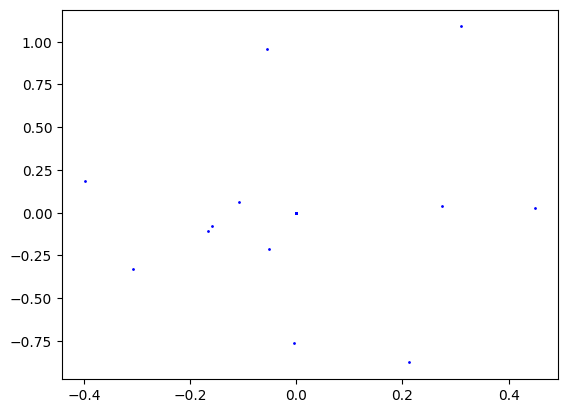

In [114]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

cloud = pickle.load(open('datasets/synthetic/morphologic/concatenated/human_angle_5.bin', 'rb'))
n = len(cloud)
print('number on points: ' + str(n))
iter = 0
progress_prev = -1

for point in cloud:
    progress = int(100 * iter / n)
    if progress > progress_prev:
        print('progress: ' + str(progress) + '%')
        progress_prev = progress

    x, y, z = point
    plt.scatter(x, y, s=1, color='blue')
    iter += 1

plt.show()

number on points: 23985
progress: 0%
progress: 1%
progress: 2%
progress: 3%
progress: 4%
progress: 5%
progress: 6%
progress: 7%
progress: 8%
progress: 9%
progress: 10%
progress: 11%
progress: 12%
progress: 13%
progress: 14%
progress: 15%
progress: 16%
progress: 17%
progress: 18%
progress: 19%
progress: 20%
progress: 21%
progress: 22%
progress: 23%
progress: 24%
progress: 25%
progress: 26%
progress: 27%
progress: 28%
progress: 29%
progress: 30%
progress: 31%
progress: 32%
progress: 33%
progress: 34%
progress: 35%
progress: 36%
progress: 37%
progress: 38%
progress: 39%
progress: 40%
progress: 41%
progress: 42%
progress: 43%
progress: 44%
progress: 45%
progress: 46%
progress: 47%
progress: 48%
progress: 49%
progress: 50%
progress: 51%
progress: 52%
progress: 53%
progress: 54%
progress: 55%
progress: 56%
progress: 57%
progress: 58%
progress: 59%
progress: 60%
progress: 61%
progress: 62%
progress: 63%
progress: 64%
progress: 65%
progress: 66%
progress: 67%
progress: 68%
progress: 69%
progre

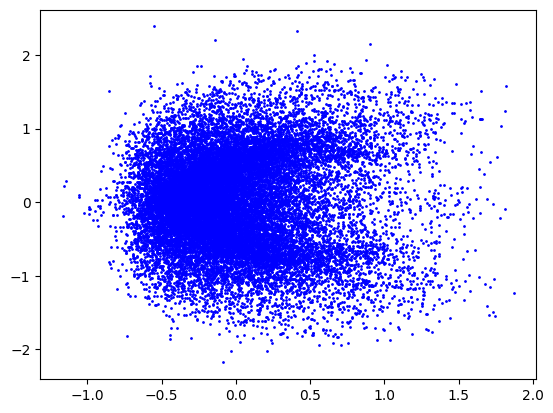

In [115]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

cloud = pickle.load(open('datasets/synthetic/morphologic/concatenated/dolphin_angle_1.bin', 'rb'))
n = len(cloud)
print('number on points: ' + str(n))
iter = 0
progress_prev = -1

for point in cloud:
    progress = int(100 * iter / n)
    if progress > progress_prev:
        print('progress: ' + str(progress) + '%')
        progress_prev = progress

    x, y, z = point
    plt.scatter(x, y, s=1, color='blue')
    iter += 1

plt.show()

number on points: 1980
progress: 0%
progress: 1%
progress: 2%
progress: 3%
progress: 4%
progress: 5%
progress: 6%
progress: 7%
progress: 8%
progress: 9%
progress: 10%
progress: 11%
progress: 12%
progress: 13%
progress: 14%
progress: 15%
progress: 16%
progress: 17%
progress: 18%
progress: 19%
progress: 20%
progress: 21%
progress: 22%
progress: 23%
progress: 24%
progress: 25%
progress: 26%
progress: 27%
progress: 28%
progress: 29%
progress: 30%
progress: 31%
progress: 32%
progress: 33%
progress: 34%
progress: 35%
progress: 36%
progress: 37%
progress: 38%
progress: 39%
progress: 40%
progress: 41%
progress: 42%
progress: 43%
progress: 44%
progress: 45%
progress: 46%
progress: 47%
progress: 48%
progress: 49%
progress: 50%
progress: 51%
progress: 52%
progress: 53%
progress: 54%
progress: 55%
progress: 56%
progress: 57%
progress: 58%
progress: 59%
progress: 60%
progress: 61%
progress: 62%
progress: 63%
progress: 64%
progress: 65%
progress: 66%
progress: 67%
progress: 68%
progress: 69%
progres

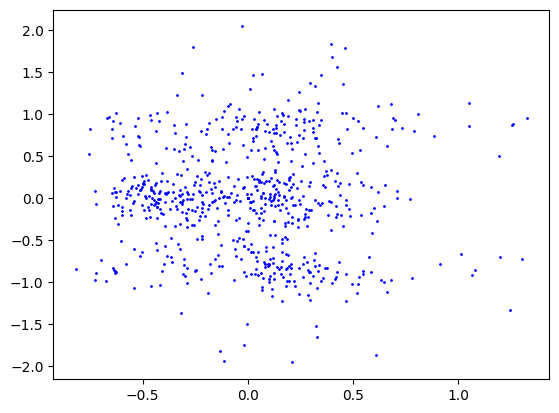

In [116]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

cloud = pickle.load(open('datasets/synthetic/morphologic/concatenated/dolphin_angle_5.bin', 'rb'))
n = len(cloud)
print('number on points: ' + str(n))
iter = 0
progress_prev = -1

for point in cloud:
    progress = int(100 * iter / n)
    if progress > progress_prev:
        print('progress: ' + str(progress) + '%')
        progress_prev = progress

    x, y, z = point
    plt.scatter(x, y, s=1, color='blue')
    iter += 1

plt.show()

In [117]:
from pointcloud_processor import PointcloudProcessor as pp 
import numpy as np
import pickle

dataset = pickle.load(open('datasets/synthetic/morphologic/separate/morphologic_1_angle_1.bin', 'rb'))

n = len(dataset)
sb_dataset = []
iter = 0
prev = -1

for frame in dataset:
    progress = int(100 * iter / n)
    if progress > prev:
        print('in progress: ' + str(progress) + "%")
        prev = progress

    name = frame["name"]
    cloud = frame["cloud"]
    size_x, size_y, size_z = pp.get_size(cloud)
    xmin, xmax, ymin, ymax, zmin, zmax = pp.get_bounds(cloud)

    obj = {
        "name": name,
        "size_x": size_x,
        "size_y": size_y,
        "size_z": size_z,
        "xmin": xmin,
        "xmax": xmax,
        "ymin": ymin,
        "ymax": ymax,
        "zmin": zmin,
        "zmax": zmax
    }
    sb_dataset.append(obj)
    iter += 1

print('saving dump...')
pickle.dump(sb_dataset, open('datasets/synthetic/morphologic/size_based/size_based_angle_1.bin', 'wb'))
print('dump saved')

in progress: 0%
in progress: 1%
in progress: 2%
in progress: 3%
in progress: 4%
in progress: 5%
in progress: 6%
in progress: 7%
in progress: 8%
in progress: 9%
in progress: 10%
in progress: 11%
in progress: 12%
in progress: 13%
in progress: 14%
in progress: 15%
in progress: 16%
in progress: 17%
in progress: 18%
in progress: 19%
in progress: 20%
in progress: 21%
in progress: 22%
in progress: 23%
in progress: 24%
in progress: 25%
in progress: 26%
in progress: 27%
in progress: 28%
in progress: 29%
in progress: 30%
in progress: 31%
in progress: 32%
in progress: 33%
in progress: 34%
in progress: 35%
in progress: 36%
in progress: 37%
in progress: 38%
in progress: 39%
in progress: 40%
in progress: 41%
in progress: 42%
in progress: 43%
in progress: 44%
in progress: 45%
in progress: 46%
in progress: 47%
in progress: 48%
in progress: 49%
in progress: 50%
in progress: 51%
in progress: 52%
in progress: 53%
in progress: 54%
in progress: 55%
in progress: 56%
in progress: 57%
in progress: 58%
in prog

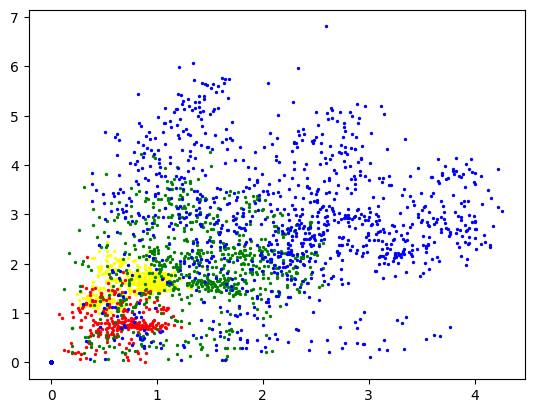

In [118]:
import matplotlib.pyplot as plt

for frame in sb_dataset:
    name = frame["name"]
    x = frame["size_x"]
    y = frame["size_y"]
    z = frame["size_z"]

    color = 'yellow'
    if name == "human":
        color = "red"
    if name == "dolphin":
        color = "green"
    if name == "drone":
        color = "blue"

    plt.scatter(x, y, s=2, color=color)

plt.show()

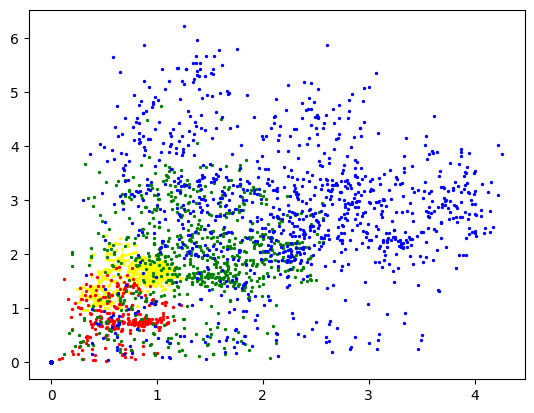

In [119]:
for frame in sb_dataset:
    name = frame["name"]
    x = frame["size_x"]
    y = frame["size_y"]
    z = frame["size_z"]

    color = 'yellow'
    if name == "human":
        color = "red"
    if name == "dolphin":
        color = "green"
    if name == "drone":
        color = "blue"

    plt.scatter(x, z, s=2, color=color)

plt.show()

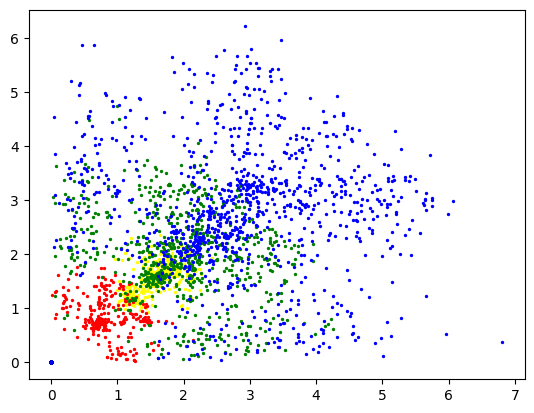

In [120]:
for frame in sb_dataset:
    name = frame["name"]
    x = frame["size_x"]
    y = frame["size_y"]
    z = frame["size_z"]

    color = 'yellow'
    if name == "human":
        color = "red"
    if name == "dolphin":
        color = "green"
    if name == "drone":
        color = "blue"

    plt.scatter(y, z, s=2, color=color)

plt.show()

Creating logistic regression and SVM for size-based morphologic classificator

In [121]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model, svm
from sklearn import metrics

X = []
Y = []

sb_dataset = pickle.load(open('datasets/synthetic/morphologic/size_based/size_based_angle_1.bin', 'rb'))

for frame in sb_dataset:
    name = frame["name"]
    x = frame["size_x"]
    y = frame["size_y"]
    z = frame["size_z"]

    xmin = frame["xmin"]
    ymin = frame["ymin"]
    zmin = frame["zmin"]
    xmax = frame["xmax"]
    ymax = frame["ymax"]
    zmax = frame["zmax"]

    C = 0
    if name == "human":
        C = 1
    elif name == "dolphin":
        C = 2
    elif name == "drone":
        C = 3

    Y.append(C)
    X.append([x, y, z])

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state = 1)

#model = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
model_rfb = svm.SVC(kernel='rbf', gamma=0.5, C=10)
#model_poly = svm.SVC(kernel='poly', degree=3, C=1)

model_rfb.fit(x_train, y_train)
#model_poly.fit(x_train, y_train)

pickle.dump(model_rfb, open('models/svm/svm_rfb.bin', 'wb'))
#pickle.dump(model_poly, open('models/svm/svm_poly.bin', 'wb'))

Validating size-based logistic regression model and SVM model

In [122]:
model = pickle.load(open('models/svm/svm_rfb.bin', 'rb'))

model.score(x_test, y_test)

0.5910714285714286

PointNet - like cloud aggregation

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Random trajectories generation

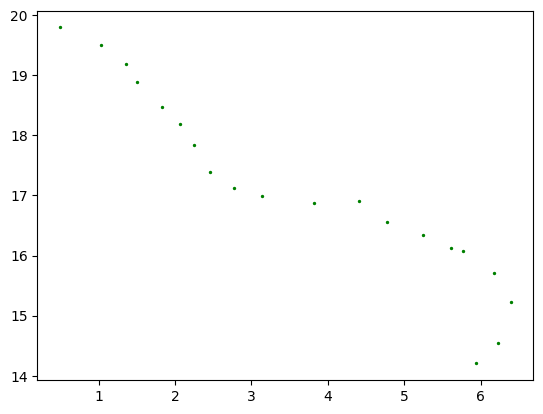

In [35]:
import numpy as np
from pointcloud_processor import PointcloudProcessor as pp
import matplotlib.pyplot as plt

start = np.array([0, 20, 0, 0, 0, 0])
v_mean = 5
sigma_v = 1
sigma_angle = np.pi / 8
T = 0.1

traj = [start]

for t in range(20):
    x_prev, y_prev, z_prev, roll_prev, pitch_prev, yaw_prev = traj[t]
    v = np.random.normal(v_mean, sigma_v)
    angle = roll_prev + np.random.normal(0, sigma_angle)

    x = x_prev + v * T * np.cos(angle)
    y = y_prev + v * T * np.sin(angle)
    z = 0
    roll = angle
    pitch = 0
    yaw = 0

    point_new = np.array([x, y, z, roll, pitch, yaw])
    traj.append(point_new)

    plt.scatter(x, y, s=2, color='green')

plt.show()


Model for "good" locator definition only

In [8]:
import pickle

features = pickle.load(open('datasets/synthetic/united/features_3.bin', 'rb'))
n = len(features)

names = []
x_sizes = []
y_sizes = []
z_sizes = []
v_means = []
v_sigmas = []
curvatures = []

for obj in features:
    name = obj["name"]
    x_size = obj["x_size"]
    y_size = obj["y_size"]
    z_size = obj["z_size"]
    v_mean = obj["v_mean"]
    v_sigma = obj["v_sigma"]
    curvature = obj["curvature"]

    names.append(name)
    x_sizes.append(x_size)
    y_sizes.append(y_size)
    z_sizes.append(z_size)
    v_means.append(v_mean)
    v_sigmas.append(v_sigma)
    curvatures.append(curvature)

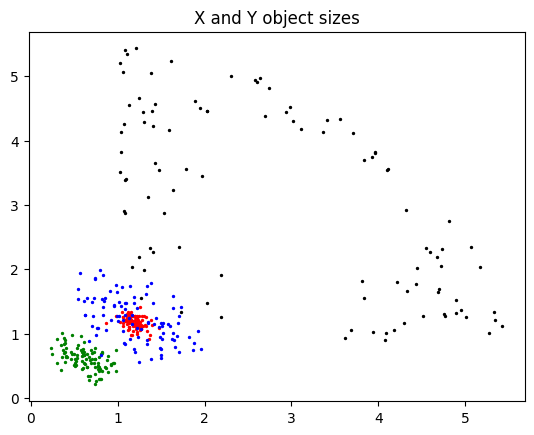

In [2]:
import matplotlib.pyplot as plt

color_sphere = 'red'
color_human = 'green'
color_dolphin = 'blue'
color_drone = 'black'

for i in range(n):
    name = names[i]
    x = x_sizes[i]
    y = y_sizes[i]

    if name == 'sphere':
        color = color_sphere
    if name == 'human':
        color = color_human
    if name == 'dolphin':
        color = color_dolphin
    if name == 'drone':
        color = color_drone

    plt.scatter(x, y, s=2, color=color)

plt.title('X and Y object sizes')
plt.show()

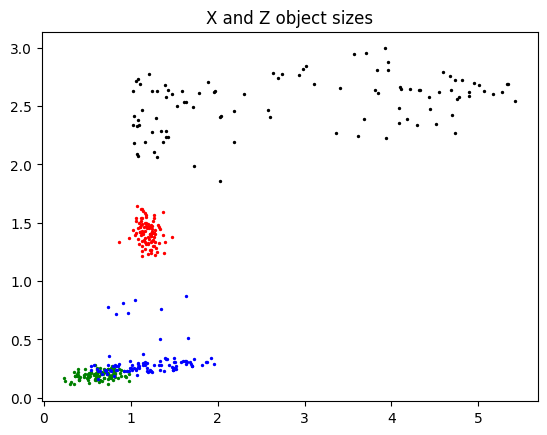

In [41]:
for i in range(n):
    name = names[i]
    x = x_sizes[i]
    y = z_sizes[i]

    if name == 'sphere':
        color = color_sphere
    if name == 'human':
        color = color_human
    if name == 'dolphin':
        color = color_dolphin
    if name == 'drone':
        color = color_drone

    plt.scatter(x, y, s=2, color=color)

plt.title('X and Z object sizes')
plt.show()

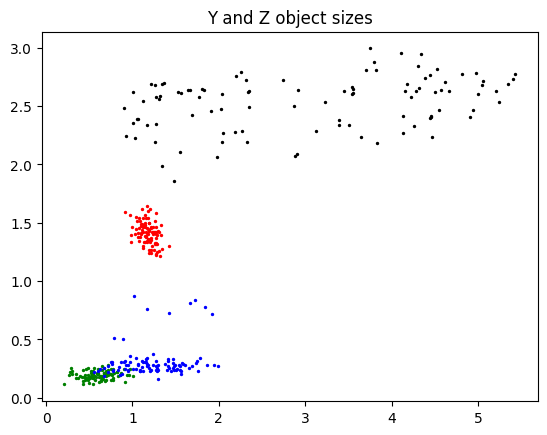

In [42]:
for i in range(n):
    name = names[i]
    x = y_sizes[i]
    y = z_sizes[i]

    if name == 'sphere':
        color = color_sphere
    if name == 'human':
        color = color_human
    if name == 'dolphin':
        color = color_dolphin
    if name == 'drone':
        color = color_drone

    plt.scatter(x, y, s=2, color=color)

plt.title('Y and Z object sizes')
plt.show()

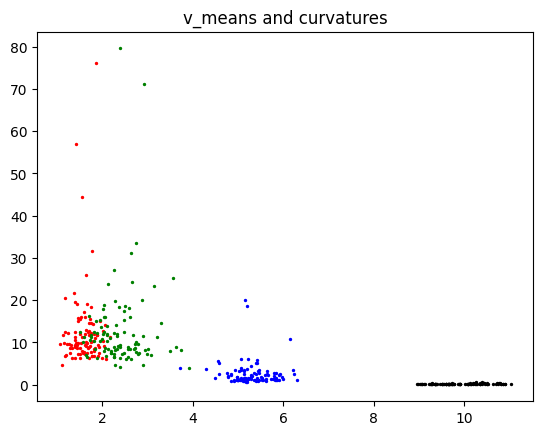

In [11]:
import matplotlib.pyplot as plt

for i in range(n):
    name = names[i]
    x = v_means[i]
    y = curvatures[i]

    if name == 'sphere':
        color = color_sphere
    if name == 'human':
        color = color_human
    if name == 'dolphin':
        color = color_dolphin
    if name == 'drone':
        color = color_drone

    plt.scatter(x, y, s=2, color=color)

plt.title('v_means and curvatures')
plt.show()

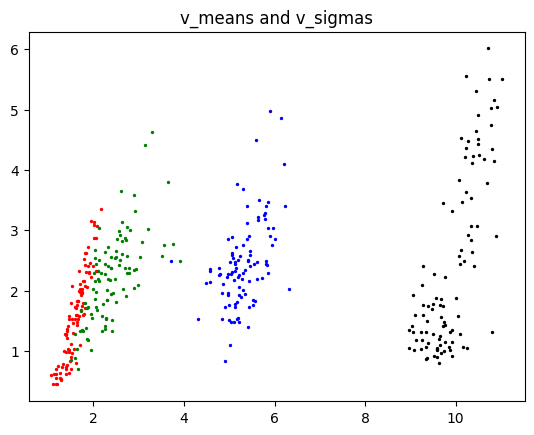

In [12]:
for i in range(n):
    name = names[i]
    x = v_means[i]
    y = v_sigmas[i]

    if name == 'sphere':
        color = color_sphere
    if name == 'human':
        color = color_human
    if name == 'dolphin':
        color = color_dolphin
    if name == 'drone':
        color = color_drone

    plt.scatter(x, y, s=2, color=color)

plt.title('v_means and v_sigmas')
plt.show()

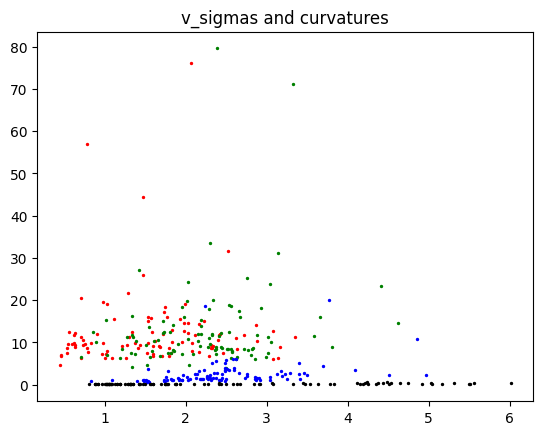

In [13]:
for i in range(n):
    name = names[i]
    x = v_sigmas[i]
    y = curvatures[i]

    if name == 'sphere':
        color = color_sphere
    if name == 'human':
        color = color_human
    if name == 'dolphin':
        color = color_dolphin
    if name == 'drone':
        color = color_drone

    plt.scatter(x, y, s=2, color=color)

plt.title('v_sigmas and curvatures')
plt.show()

In [66]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model, svm
from sklearn import metrics

X = []
Y = []

for i in range(n):
    name = names[i]
    x_size = x_sizes[i]
    y_size = y_sizes[i]
    z_size = z_sizes[i]
    v_mean = v_means[i]
    v_sigma = v_sigmas[i]
    curvature = curvatures[i]

    C = 0
    if name == "human":
        C = 1
    elif name == "dolphin":
        C = 2
    elif name == "drone":
        C = 3

    Y.append(C)
    X.append([x_size, y_size, z_size, v_mean, v_sigma, curvature])

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state = 1)

#model = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
model_rfb = svm.SVC(kernel='rbf', gamma=0.5, C=10)
#model_poly = svm.SVC(kernel='poly', degree=3, C=1)

model_rfb.fit(x_train, y_train)
#model_poly.fit(x_train, y_train)

pickle.dump(model_rfb, open('models/svm/svm_rfb_united.bin', 'wb'))
#pickle.dump(model_poly, open('models/svm/svm_poly.bin', 'wb'))

In [67]:
model = pickle.load(open('models/svm/svm_rfb_united.bin', 'rb'))
model.score(x_test, y_test)

0.9625

In [65]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model, svm
from sklearn import metrics

X = []
Y = []

sb_dataset = pickle.load(open('datasets/synthetic/united/features_validate_1.bin', 'rb'))

for frame in sb_dataset:
    name = frame["name"]
    x = frame["x_size"]
    y = frame["y_size"]
    z = frame["z_size"]

    v_mean = frame["v_mean"]
    v_sigma = frame["v_sigma"]
    curvature = frame["curvature"]

    C = 0
    if name == "human":
        C = 1
    elif name == "dolphin":
        C = 2
    elif name == "drone":
        C = 3

    Y.append(C)
    X.append([x, y, z, v_mean, v_sigma, curvature])

In [68]:
model = pickle.load(open('models/svm/svm_rfb_united.bin', 'rb'))
model.score(X, Y)

0.9925

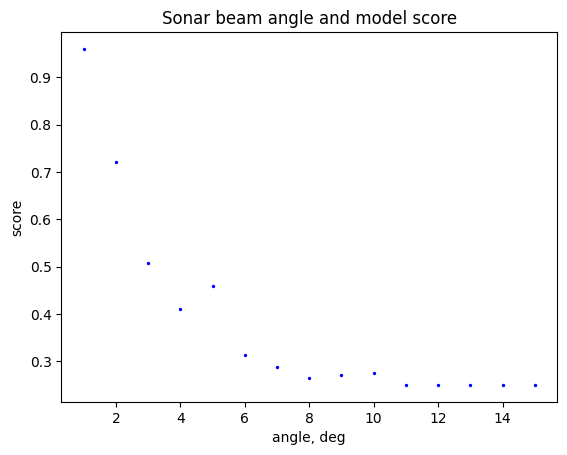

In [70]:
import numpy as np
scores = np.loadtxt('datasets/synthetic/united/scores.txt', delimiter=' ')

for p in scores:
    a, score = p
    plt.scatter(a, score, s=2, color='blue')

plt.title('Sonar beam angle and model score')
plt.xlabel('angle, deg')
plt.ylabel('score')
plt.show()

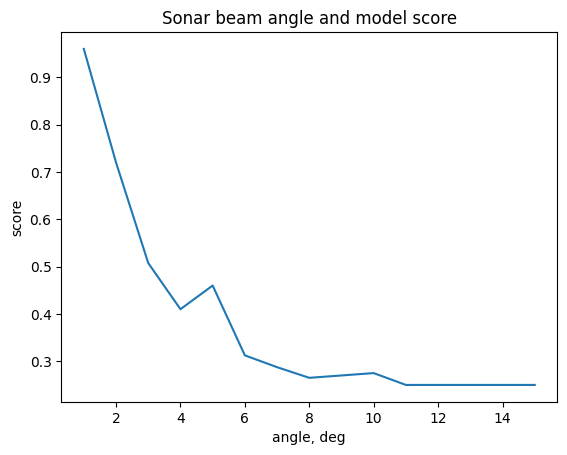

In [71]:
plt.plot(scores[:,0], scores[:,1])

plt.title('Sonar beam angle and model score')
plt.xlabel('angle, deg')
plt.ylabel('score')
plt.show()

Model for concatenated good and bad locator datasets

array([0.96  , 0.72  , 0.5075, 0.41  , 0.46  , 0.3125, 0.2875, 0.265 ,
       0.27  , 0.275 , 0.25  , 0.25  , 0.25  , 0.25  , 0.25  ])